In [1]:
import os
from tqdm import tqdm
from itertools import accumulate
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import definitions as defs
import isometry as isometry

import plot_defs as myplot

In [2]:
def dirtINT2Optimized(v, stat):
    probs = stat * v
    return np.random.poisson(probs, size=len(probs)) / stat

In [3]:
folders = ['01_09','01_21','11_21','12_12']
Nruns = [5, 4, 6, 6]
Nstates =[300, 300, 166,300]

In [4]:
avmsetest = {} 
maxmsetest = {}
minmsetest = {}

expmse = {}

In [10]:
for select in range(4):
    fold =folders[select]
    repetitions = Nruns[select]
    num_states = Nstates[select]
    
    data_sep = [None] * repetitions
    dataRAW_sep = [None] * repetitions
    data_ent = [None] * repetitions
    dataRAW_ent = [None] * repetitions
    
    for rep in range(repetitions):
        with open(f'./Separabili_{fold}_rep_'+str(rep)+'.json') as f:
            data_sep[rep] = pd.DataFrame(json.load(f))
    for rep in range(repetitions):
        with open(f'./Entangled_{fold}_rep_'+str(rep)+'.json') as f:
            data_ent[rep] = pd.DataFrame(json.load(f))
    for rep in range(repetitions):
        with open(f'./SeparabiliRAW_{fold}_rep_'+str(rep)+'.json') as f:
            dataRAW_sep[rep] = pd.DataFrame(json.load(f))
    for rep in range(repetitions):
        with open(f'./EntangledRAW_{fold}_rep_'+str(rep)+'.json') as f:
            dataRAW_ent[rep] = pd.DataFrame(json.load(f))


    anglesQW1 = {}
    anglesQW2 = {}
    sep_state_ref = {}
    ent_state_ref = {}
    # QW ANGLES [alpha1, delta1,  zeta2,theta2,phi2,   alpha2,delta2,  theta_p,phi_p]

    anglesQW1['01_09'] = [0.3316125578789226, 1.5707963267948966, 1.0070977275570985, 1.5570696348907915, 2.908160255954825, 1.3439035240356338, 3.141592653589793, 4.539779498163959, 1.5707963284790725]
    anglesQW2['01_09'] = [5.8643062867009474, 1.5707963267948966, 1.095755783171672, 1.5937676381596888, 2.89289820797498, 2.844886680750757, 3.141592653589793, 4.54821017223903, 1.5707963277463037]
    sep_state_ref['01_09'] = [1/2, 1/2, -1/2, -1/2]
    ent_state_ref['01_09'] = [1/np.sqrt(2), 0, 0, -1/np.sqrt(2)]

    anglesQW1['01_21'] = [0.3316125578789226, 1.5707963267948966, 1.0070977275570985, 1.5570696348907915, 2.908160255954825, 1.3439035240356338, 3.141592653589793, 4.539779498163959, 1.5707963284790725]
    anglesQW2['01_21'] = [5.8643062867009474, 1.5707963267948966, 1.095755783171672, 1.5937676381596888, 2.89289820797498, 2.844886680750757, 3.141592653589793, 4.54821017223903, 1.5707963277463037]
    sep_state_ref['01_21'] = [1/2, -1/2, -1/2, 1/2]
    ent_state_ref['01_21'] = [1/np.sqrt(2), 0, 0, -1/np.sqrt(2)]

    anglesQW1['11_21'] = [0.3316125578789226, 1.5707963267948966, 2.908160255954825, 1.5570696348907915, 1.0070977275570985, 1.3439035240356338, 3.141592653589793, 4.539779498163959, 1.5707963284790725]
    anglesQW2['11_21'] = [5.8643062867009474, 1.5707963267948966, 2.89289820797498, 1.5937676381596888, 1.095755783171672, 2.844886680750757, 3.141592653589793, 4.54821017223903, 1.5707963277463037]
    sep_state_ref['11_21'] = [1/2, 1/2, -1/2, -1/2]
    ent_state_ref['11_21'] = [1/np.sqrt(2), 0, 0, -1/np.sqrt(2)]

    anglesQW1['12_12']=[0.3316125578789226, 1.5707963267948966, 3.03163293212240909, 0.26739621035255735,1.201407919651270299, 1.3439035240356338, 3.141592653589793, 1.988305525776593563, 0.292390408389419524]
    anglesQW2['12_12']=[5.8643062867009474, 1.5707963267948966, 1.32290702615153614, 1.80951555206664139, 0.65633642655426307, 2.844886680750757, 3.141592653589793, 0.685928880617840962, 2.303692086342170878]
    sep_state_ref['12_12'] = [1/2, 1/2, -1/2, -1/2]
    ent_state_ref['12_12'] = [1/np.sqrt(2), 0, 0, -1/np.sqrt(2)]
    

    HWP1_sep = data_sep[0].groupby('State')['Angle_HWP1'].apply(defs.first).values
    HWP2_sep = data_sep[0].groupby('State')['Angle_HWP2'].apply(defs.first).values
    HWP1_ent = data_ent[0].groupby('State')['Angle_HWP1'].apply(defs.first).values
    HWP2_ent = data_ent[0].groupby('State')['Angle_HWP2'].apply(defs.first).values
    QWP1_sep = data_sep[0].groupby('State')['Angle_QWP1'].apply(defs.first).values
    QWP2_sep = data_sep[0].groupby('State')['Angle_QWP2'].apply(defs.first).values
    QWP1_ent = data_ent[0].groupby('State')['Angle_QWP1'].apply(defs.first).values
    QWP2_ent = data_ent[0].groupby('State')['Angle_QWP2'].apply(defs.first).values

    angles_sep = np.pi/180 * np.vstack((HWP2_sep,QWP2_sep,HWP1_sep,QWP1_sep)).T
    angles_ent = np.pi/180 * np.vstack((HWP2_ent,QWP2_ent,HWP1_ent,QWP1_ent)).T

    sep_states = [defs.state_from_angles(angles,sep_state_ref[fold]) for angles in angles_sep]
    ent_states = [defs.state_from_angles(angles,ent_state_ref[fold]) for angles in angles_ent]

    states = np.vstack((sep_states,ent_states))

    pauli2 = defs.pauli2
    expval_pauli = []
    for op in pauli2:
        expval_pauli += [[st.conj() @ op @ st for st in states]]
    expval_pauli = np.array(expval_pauli).T.real

    VV = np.kron(isometry.isometry(anglesQW1[fold]),isometry.isometry(anglesQW2[fold]))
    probs = np.array([(np.abs(VV@st)**2) for st in states])

    counts_rep_sep = [None] * repetitions
    counts_rep_ent = [None] * repetitions
    counts_rep = [None] * repetitions
    for rep in range(repetitions):
        counts_rep_sep[rep] = np.stack(dataRAW_sep[rep].groupby('State')['doubles'].apply(np.array).values)
        counts_rep_ent[rep] = np.stack(dataRAW_ent[rep].groupby('State')['doubles'].apply(np.array).values)
        counts_rep[rep] = np.vstack((counts_rep_sep[rep],counts_rep_ent[rep]))
    counts_tot = np.sum([counts_rep[rep] for rep in range(repetitions)],axis=0)

    y = expval_pauli

    kkk = num_states//4
    indtrain =  np.hstack([range(kkk),range(2*kkk,3*kkk)])
    indtest = np.hstack([range(kkk,2*kkk),range(3*kkk,4*kkk)])   

    #indtrain = np.random.choice(range(num_states), num_states//2, replace=False)
    #indtest = np.setdiff1d(np.arange(num_states), indtrain)
    
    ytrain = y[indtrain]
    ytest = y[indtest]

    #------------------------------------#
    #------------------------------------#
    #------------------------------------#

    statlist = np.round(10**np.arange(1,9.1,0.01))

    msetest={}
    msetest[fold] = []

    for rep in tqdm(range(10)):
        mse = []
        for stat in statlist:
            v = np.array([dirtINT2Optimized(p,stat) for p in probs])
            vtrain = v[indtrain]
            vtest = v[indtest]

            W = np.linalg.pinv(vtrain)@ytrain

            ypred1 = vtrain@W.real
            ypred2 = vtest@W.real

            #msetrain = np.array(np.split(np.array([defs.MSE(ytrain.T[k],ypred1.T[k]) for k in range(len(pauli2))]),4))
            mse += [np.mean([defs.MSE(ytest.T[k],ypred2.T[k]) for k in range(len(pauli2))])]
        msetest[fold] += [mse]
    avmsetest[fold] = np.mean(np.array(msetest[fold]),axis=0)
    maxmsetest[fold] = np.max(np.array(msetest[fold]),axis=0)
    minmsetest[fold] = np.min(np.array(msetest[fold]),axis=0)

    #------------------------------------#
    #------------------------------------#
    #------------------------------------#
    
    expmse[fold]=[]
    cumulative_reps = list(accumulate(counts_rep))

    for v in cumulative_reps:

        vtrain = v[indtrain]
        vtest = v[indtest]
        W = np.linalg.pinv(vtrain)@ytrain
        ypred1 = vtrain@W.real
        ypred2 = vtest@W.real
        #msetrain = np.array(np.split(np.array([defs.MSE(ytrain.T[k],ypred1.T[k]) for k in range(len(pauli2))]),4))
        expmse[fold] +=[[np.sum(np.mean(v,axis=0)),np.mean((np.array([defs.MSE(ytest.T[k],ypred2.T[k]) for k in range(len(pauli2))])))]]

100%|██████████| 10/10 [00:17<00:00,  1.75s/it]


In [6]:
def randomangles():
    return np.stack([np.array([0.3316125578789226]), np.array([1.5707963267948966]),np.random.rand(1)*2*np.pi,np.random.rand(1)*2*np.pi,np.random.rand(1)*2*np.pi,np.array([1.3439035240356338]), np.array([3.141592653589793]),np.random.rand(1)*2*np.pi,np.random.rand(1)*2*np.pi]).flatten()

In [7]:
mserandom = []

for rep in tqdm(range(100)):
    mse = []
    VV = np.kron(isometry.isometry(randomangles()),isometry.isometry(randomangles()))

    probs = np.array([(np.abs(VV@st)**2) for st in states])
    for stat in statlist:
        v = np.array([dirtINT2Optimized(p,stat) for p in probs])
        vtrain = v[indtrain]
        vtest = v[indtest]

        W = np.linalg.pinv(vtrain)@ytrain

        ypred1 = vtrain@W.real
        ypred2 = vtest@W.real

        #msetrain = np.array(np.split(np.array([defs.MSE(ytrain.T[k],ypred1.T[k]) for k in range(len(pauli2))]),4))
        mse += [np.mean([defs.MSE(ytest.T[k],ypred2.T[k]) for k in range(len(pauli2))])]
    mserandom += [mse]
avmserandom = np.mean(np.array(mserandom),axis=0)
maxmserandom = np.max(np.array(mserandom),axis=0)
minmserandom = np.min(np.array(mserandom),axis=0)

100%|██████████| 100/100 [02:53<00:00,  1.74s/it]


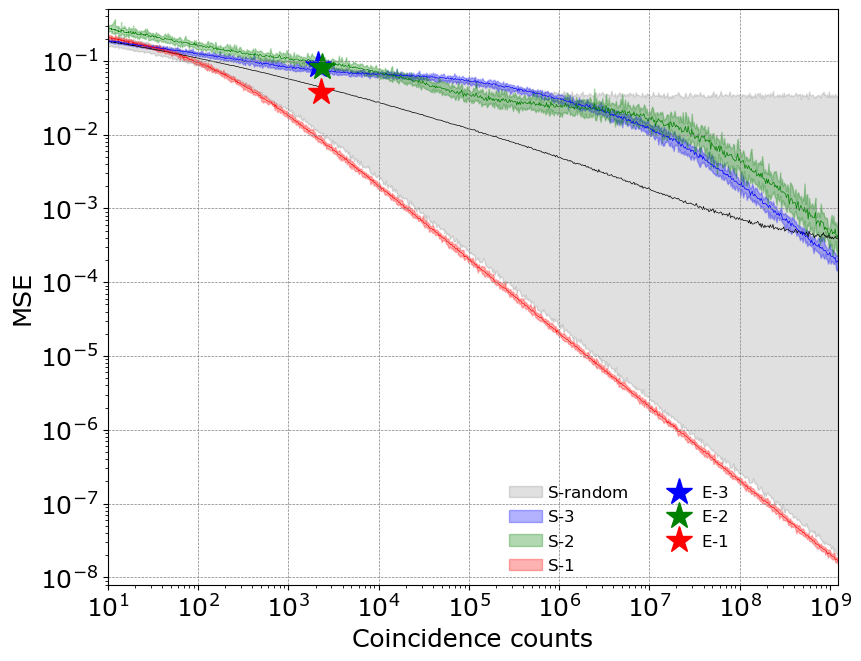

In [11]:
plt.rcParams.update({
    "font.size": 14,
    "axes.titlesize": 16,
    "axes.labelsize": 18,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "legend.fontsize": 12,
    "font.family": "Verdana",
})

fig, ax = plt.subplots(1, 1, figsize=(8.5, 6.5), constrained_layout=True)

ax.plot(statlist, avmserandom, '-', color='k', linewidth=0.5)
ax.fill_between(statlist, minmserandom, maxmserandom, alpha=0.12, color='k', label='$\mathsf{S}\\text{-random}$')

ax.plot(statlist, avmsetest['12_12'], '-', color='b', linewidth=0.5)
ax.fill_between(statlist, minmsetest['12_12'], maxmsetest['12_12'], alpha=0.3, color='b', label='$\mathsf{S}\\text{-3}$')

ax.plot(statlist, avmsetest['11_21'], '-', color='g', linewidth=0.5)
ax.fill_between(statlist, minmsetest['11_21'], maxmsetest['11_21'], alpha=0.3, color='g', label='$\mathsf{S}\\text{-2}$')

ax.plot(statlist, avmsetest['01_21'], '-', color='r', linewidth=0.5)
ax.fill_between(statlist, minmsetest['01_21'], maxmsetest['01_21'], alpha=0.3, color='r', label='$\mathsf{S}\\text{-1}$')

ax.plot(np.array(expmse['12_12']).T[0][5], np.array(expmse['12_12']).T[1][5], '*', color='b',  markersize=20, label='$\mathsf{E}\\text{-3}$')
ax.plot(np.array(expmse['11_21']).T[0][5], np.array(expmse['11_21']).T[1][5], '*', color='g',  markersize=20, label='$\mathsf{E}\\text{-2}$')
ax.plot(np.array(expmse['01_21']).T[0][3], np.array(expmse['01_21']).T[1][3], '*', color='r',  markersize=20, label='$\mathsf{E}\\text{-1}$')



ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel("Coincidence counts")
ax.set_ylabel("MSE")

ax.set_ylim(.8 * 10**-8, .5)

ax.legend(loc='upper center', bbox_to_anchor=(0.7, .2), ncol=2, frameon=False, handletextpad=0.3)

for ex in range(1, 9):
    ax.axhline(10**-ex, color='gray', linewidth=0.5, linestyle='--')
    ax.axvline(10**ex, color='gray', linewidth=0.5, linestyle='--')
ax.margins(0)
plt.show()
#fig.savefig(f'../fig4_main.pdf', bbox_inches='tight')

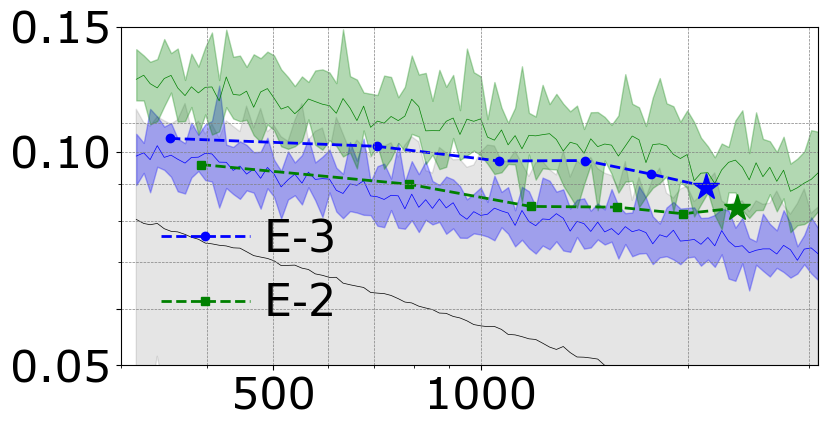

In [12]:
plt.rcParams.update({
    "font.size": 14,
    "axes.titlesize": 16,
    "axes.labelsize": 24,
    "xtick.labelsize": 32,
    "ytick.labelsize": 32,
    "legend.fontsize": 32,
})

fig, ax = plt.subplots(1, 1, figsize=(8.5, 4.5))

start = 150
steps = 250

ax.plot(statlist[start:steps], avmserandom[start:steps], '-', color='k', linewidth=0.5)
ax.fill_between(statlist[start:steps], minmserandom[start:steps], maxmserandom[start:steps], alpha=0.1, color='k')

ax.plot(statlist[start:steps], avmsetest['12_12'][start:steps], '-', color='b',linewidth=0.5,)
ax.fill_between(statlist[start:steps], minmsetest['12_12'][start:steps], maxmsetest['12_12'][start:steps], alpha=0.3, color='b')


ax.plot(statlist[start:steps], avmsetest['11_21'][start:steps], '-', color='g', linewidth=0.5)
ax.fill_between(statlist[start:steps], minmsetest['11_21'][start:steps], maxmsetest['11_21'][start:steps], alpha=0.3, color='g')

#ax.plot(statlist[start:steps], avmsetest['01_21'][start:steps], '-', color='r', linewidth=0.5)
#ax.fill_between(statlist[start:steps], minmsetest['01_21'][start:steps], maxmsetest['01_21'][start:steps], alpha=0.3, color='r')

ax.plot(np.array(expmse['12_12']).T[0] , np.array(expmse['12_12']).T[1], 'o--', color='b', linewidth=2, label='$\mathsf{E}\\text{-3}$')
ax.plot(np.array(expmse['11_21']).T[0] , np.array(expmse['11_21']).T[1], 's--', color='g', linewidth=2, label='$\mathsf{E}\\text{-2}$')#, label='Exp. non-optimal reservoir')
#ax.plot(np.array(expmse['01_21']).T[0] , np.array(expmse['01_21']).T[1], 'D--', color='r', linewidth=2, label='Exp. optimal reservoir')


ax.plot(np.array(expmse['12_12']).T[0][5], np.array(expmse['12_12']).T[1][5], '*', color='b',  markersize=20)#, label='Exp. non-optimal reservoir')
ax.plot(np.array(expmse['11_21']).T[0][5], np.array(expmse['11_21']).T[1][5], '*', color='g',  markersize=20)#, label='Exp. non-optimal reservoir')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylim(5 * 10**-2, .15)


xticks = [100,500,1000,5000,10000]
xlabels = [str(tt) for tt in xticks]
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)


yticks = [0.15,0.1,0.06,0.05]
ylabels = ['0.15', '0.10','', '0.05']
ax.set_yticks(yticks,minor=False)
ax.set_yticklabels(ylabels)


ax.legend(loc="lower left", frameon=False, handletextpad=0.3)

for ex in range(0, 12):
    ax.axhline(ex * 10**-2, color='gray', linewidth=0.5, linestyle='--')
for ex in range(3, 8):
    ax.axvline(ex * 10**2, color='gray', linewidth=0.5, linestyle='--')
for ex in range(0, 4):
    ax.axvline(ex * 10**3, color='gray', linewidth=0.5, linestyle='--')
ax.margins(0)
ax.set_facecolor('none')  # Makes the axes background transparent

plt.tight_layout()
plt.show()
fig.savefig(f'../fig4_inset.pdf', bbox_inches='tight')
